<a href="https://colab.research.google.com/github/ernestopalacios/07MBID/blob/main/AG1_ErnestoPalacios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>PRÁCTICA 1: APRENDIZAJE NO SUPERVISADO (DengAI)<center>

**Nombre y apellidos:** Ernesto Vladimir Palacios Merino

**Usuario VIU:** epalaciosm@student.universidadviu.com

<font color="green">*\[\[IMPORTANTE: Este notebook debe usarse como plantilla para empezar esta práctica. Antes de entregar el notebook, se deben eliminar todas las líneas de texto entre dobles corchetes como esta.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Se debe leer y comprender esta plantilla de principio a fin antes de empezar. En estas líneas con anotaciones se resuelven las dudas y errores más comunes de la elaboración de esta práctica.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Todas las secciones definidas en esta plantilla deben estar presentes en la entrega final y respetarse para facilitar la corrección, aunque cada estudiante puede añadir las subsecciones que considere. Los huecos para rellenar al principio del notebook y la tabla de la sección "Conclusiones" son obligatorios.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Se debe entregar un único notebook de Jupyter (fichero *.ipynb) con la práctica desarrollada. Debe estar autocontenido, ya que no se corregirá nada más que este fichero entregado.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Todo el notebook debe ser ejecutable. En el notebook se deben dejar los resultados de los experimentos, reproducibles por el profesor en su sesión de Google Colab. Se aconseja encarecidamente que se fije una semilla aleatoria única para todos los procesos estocásticos que se vayan a llevar a cabo.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: El fichero *.ipynb, antes de corregirse, se pasará por un detector de plagios específico para estos notebooks de Jupyter con el fin de evitar cualquier tipo de fraude. Los resultados de este detector se revisarán manualmente por lo que se sugiere que el alumno especifique la fuente de los algoritmos (si son de la web) a fin de evitar problemas (no hará falta si son pequeños fragmentos de otras prácticas en las que participó el mismo alumno). Si se demuestra copia de toda o parte de esta práctica de otros alumnos de esta asignatura, en la convocatoria/edición de la asignatura actual o cualquiera anterior de la asignatura, implicará un suspenso con 0 para todas las partes implicadas y la apertura de un expediente.\]\]*</font>

---
# Resumen
---

### Características del Dataset:

En esta sección realizaremos un breve análisis de cada unoa de las características del dataset.


#### Variables de Tiempo

- `year` : Año
- `weekofyear` : Semana (52 semanas en un año)
- `week_start_date` : Fecha en la que inicia la semana

Cada observación de nuestro dataset posiblemente es un resumen semanal.

Como primer paso, nos podemos dar cuenta de que tanto la variable "año" como "semana" estan contenidas dentro de `week_start_date`.

Conservaremos la variable `year` la cual resulta útil al momento de generar las gráficas.



#### **Ciudad**: sj, iq
- Una opción a explorar es la de partir este dataset en dos, uno para cada ciudad, si consideramos que las condiciones son particulares para cada ciudad
- Otra opción es eliminar esta etiqueta, si consideramos que no hay diferencias significativas entre ambas ciudades en lo que tiene que ver a la proliferación de mosquitos.



 **San Juan de Puerto Rico**

> En el plano económico, es el más importante centro económico e industrial de Puerto Rico, y su área metropolitana concentra la mayor parte de la actividad económica de la isla. 340,903 habitantes(2022)
>
> Altitud: (ciudad costera)
>
> 20 m.s.n.m.


**Iquitos, Perú**

> Era la metrópoli más grande de la Amazonía peruana sólo superada por Pucallpa y es la séptima ciudad más poblada del país, con una población de 479 866 habitantes.
>
> Altitud	 (ciudad amazónica)
>
> • Media	105 m s. n. m.
>
> • Máxima	220 m s. n. m.
>
> • Mínima	70 m s. n. m.



---


#### Variables de Temperatura

- `station_max_temp_c` – Maximum temperature
- `station_min_temp_c` – Minimum temperature
- `station_avg_temp_c` – Average temperature
- `station_diur_temp_rng_c` – Diurnal temperature range
- `reanalysis_dew_point_temp_k` – Mean dew point temperature
- `reanalysis_air_temp_k` – Mean air temperature
- `reanalysis_max_air_temp_k` – Maximum air temperature
- `reanalysis_min_air_temp_k` – Minimum air temperature
- `reanalysis_avg_temp_k` – Average air temperature
- `reanalysis_tdtr_k` – Diurnal temperature range

En el dataset existen 10 diferentes medidas de temperatura, posiblemente podamos reducirlas, con el objetivo de reducir la dimensionalidad del Dataset.



#### Variables de Humedad

- reanalysis_dew_point_temp_k – Mean dew point temperature (temperatura de rocio)*
- reanalysis_relative_humidity_percent – Mean relative humidity
- reanalysis_specific_humidity_g_per_kg – Mean specific humidity


>La temperatura de punto de rocío es la temperatura a la que un volumen dado de aire debe enfriarse para saturarse con vapor de agua. Cuando el aire se enfría por debajo de este punto, su capacidad de humedad disminuye y el vapor de agua en el aire se condensa en agua líquida, formando rocío. Si la temperatura baja aún más, en lugar de rocío, puede formarse escarcha. El punto de rocío depende de la humedad del aire: cuanto más contenido de humedad tenga, más alto será el punto de rocío. La mayoría de las personas encuentran cómoda una temperatura de punto de rocío de 60°F (16°C) o menos.


#### Variables de precipitaciones

- station_precip_mm – Total precipitation
- precipitation_amt_mm – Total precipitation
- reanalysis_sat_precip_amt_mm – Total precipitation
- reanalysis_precip_amt_kg_per_m2 – Total precipitation


#### Variables de vegetación
- ndvi_se – Pixel southeast of city centroid
- ndvi_sw – Pixel southwest of city centroid
- ndvi_ne – Pixel northeast of city centroid
- ndvi_nw – Pixel northwest of city centroid

Esta variable nos habla de la presencia de vegetación en la zona, en principio podriamos combinar estas variables en una sola, una posible razón para mantenerlo separado sería si consideramos que como toda ciudad, existirán zonas con mayor o menor población.

En el caso de combinarlas considero dos opciones:

- Promediar los valores: obtener una medida promedio de la ciudad
- Sumar los valores: obtener un valor máximo de vegetación para la ciudad

Me inclino más por la segunda opción, ya que un aumento significativo en un sector combinado con un decremento puede verse "enmascarado" con un promedio, pero una sumatoria nos brindará **un verdadero valor máximo para cuando normalicemos nuestra variable**



---

### Planificación de Actividades.

1. Analisis inicial:
   - Para entender mejor el dataset exploraremos su distribución en el tiempo
   - Reriramos la columna `weekofyear` una vez que hemos verificado que no hay semanas faltantes.
   - Convertimos la colimna `week_start_date` a tipo `DateObject`
   - Convertimos los datos de temperatura de tal manera que todos se lean en `Centigrados`

2. Tratamientos de valores perdidos:
   - Visualización de los datos faltantes.
   - Analizamos los valores agrupandolos por cada tipo: vegetación, temperatura, humedad, precipitación.
   - Existen 1456 observaciones, por lo que, si los datos faltantes son esporádicos, se considerá que no tendrán gran impacto en el modelo obtenido.
   - En todos los casos se utiliza el método de interpolación lineal para rellenar datos faltantes, esto debido a que los datos evolucionan en el tiempo, y el dato anterior y siguiente tienen la información necesaria del dato faltante.

3. Rellenar valores faltantes.
   - Vegetación: realizamos una interpolación lineal rellenando los datos de columna para luego realizar una sumatoria con todos los cuadrantes de la ciudad. **Preferimos una sumatoria a un promedio con la finalidad de tener una mayor desviación estandar**. Finalmente retiramos las columnas originales de nuestro dataset.
   
   - Temperatura: Primero analizamos los datos `Rea` y `station` por separado, finalmente nos quedamos con dos columnas: `rea_max` y `rea_min`. Retiramos las columnas de temperatura que no usaremos. Para el rango de temperatura diurna hemos optado por mantener las mediciones de estación. `station_duir_tmp_rng_C`

   - Humedad: Una vez analizados los valores se determinó que la varible a utilizar será: `dew_point`

   - Precipitaciones:


6. Análisis de Correlación
   - Una vez se han reducido las variables similares realizaremos un análisis de correlación que nos permita identificar relaciones entre nuestras variables




<font color="green">*\[\[Describir qué se va a hacer en esta práctica, mencionar las diferentes fases en las que se ha dividido la experimentación, así como las técnicas que se van a explicar en las siguientes secciones. Resumir también, muy brevemente, los principales resultados obtenidos.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Será necesario registrarse en la competición de DengAI de DrivenData para poder descargar el dataset: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/ \]\]*</font>

---
# Inicialización
---

In [1]:
# Imports generales
import pandas as pd
import numpy as np
import sklearn as skl
import io
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns


seed = 42  # Semilla aleatoria arbitraria y constante a incluir en los algoritmos estocásticos para que los experimentos sean siempre reproducibles por el profesor.

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

In [ ]:
# Subir el conjunto de entrenamiento sin variable objetivo (dengue_features_train.csv)
train = upload_files()
print(train.shape)
train.head()

Saving dengue_features_train.csv to dengue_features_train.csv
User uploaded file "dengue_features_train.csv" with length 287139 bytes
(1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


Save points

In [ ]:
bkp_og = train.copy()

In [ ]:
train = bkp_og.copy()

In [33]:
import pickle

archivo = "Dataframe_normalizado.pkl"

In [ ]:
# Guardar
#train.to_pickle( archivo )       # Guardamos en formato multidimensional el Dataframe

In [40]:
train_normal.to_pickle( archivo )       # Guardamos en formato multidimensional el Dataframe

In [3]:
# Cargar
#train = pd.read_pickle(archivo)  # Cargamos de memoria para continuar el analisis

In [ ]:
train_normal = pd.read_pickle(archivo)  # Cargamos de memoria para continuar el analisis

Mostrar información del dataset. Una visualización genérica de las observaciones y de las variables

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

---
# Exploración
---

<font color="green">*\[\[En esta y las siguientes secciones se irán describiendo y ejecutando los distintos experimentos, intercalando celdas de texto y código.\]\]*</font>

<font color="green">*\[\[Aquí se espera un análisis estadístico del dataset, generar características derivadas adicionales (si procede), detección de outliers y su eliminación (si procede), etc. El objetivo es tener una idea general de cómo son los datos, cómo están distribuidos los datos, etc.\]\]*</font>

<font color="green">*\[\[Una vez hecho eso, será necesario preprocesar esos datos, limpiarlos, detectar outliers y eliminarlos (si procede) etc. Deberían incluirse todas las funciones y transformaciones que permitirán el uso de los algoritmos de ML sobre el dataset.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: En este enlace se puede ver una descripción de qué significan las características del dataset: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/ \]\]*</font>

<font color="green">*\[\[IMPORTANTE: Todos los gráficos que se representen en este notebook deben indicar claramente el título de cada eje de coordenadas.\]\]*</font>

## 1. Analisis de Fechas

Analizaremos los años y las semanas en cada año en la que se han recolectado los datos.

In [ ]:
sj_df = train[train['city'] == 'sj']
iq_df = train[train['city'] == 'iq']
sj_df['year'].value_counts()

year
1999    52
1991    52
2005    52
2004    52
2003    52
2002    52
2001    52
2000    52
1998    52
2007    52
1997    52
1996    52
1995    52
1994    52
1993    52
1992    52
2006    52
1990    35
2008    17
Name: count, dtype: int64

In [ ]:
iq_df['year'].value_counts()

year
2001    52
2002    52
2003    52
2004    52
2005    52
2006    52
2007    52
2008    52
2009    52
2000    26
2010    26
Name: count, dtype: int64

**Verificamos los datos de fecha para cada ciudad:**
```
San Juan: desde 1990 hasta el 2008, son 18 años
Iquitos: desde el 2000 hasta el 2010, son 10 años.
```
Los Datos se solapan desde el 2000 hasta el 2008, es decir durante estos años existen datos para ambas ciudades

In [ ]:
# Retiramos la columna de año y semana
train.drop('weekofyear', axis = 1, inplace = True)

In [ ]:
# Convertimos la columna de fecha de inicio de String a DateObject
train['week_start_date'] = pd.to_datetime(train['week_start_date'])

# Convertir datos de temperatura a Celsius
train[['reanalysis_avg_temp_k','reanalysis_dew_point_temp_k', 'reanalysis_air_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']] -= 273.15

In [ ]:
# Mostramos menos decimales
pd.set_option("display.precision", 3)
train.sample(10)

,city,year,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
1073,iq,2003,2003-02-19,0.126,0.136,0.104,0.134,25.03,25.417,26.950,...,41.10,89.974,25.03,18.020,10.886,NaN,NaN,32.4,23.3,121.9
1235,iq,2006,2006-04-02,0.245,0.189,0.224,0.182,121.46,24.890,26.086,...,88.81,95.024,121.46,18.734,6.957,28.300,10.000,33.7,22.0,53.9
968,iq,2001,2001-02-12,0.155,0.135,0.149,0.157,66.84,22.220,23.343,...,37.96,94.884,66.84,15.930,6.043,26.300,8.950,33.0,21.0,83.1
1427,iq,2009,2009-12-10,0.192,0.194,0.240,0.286,85.62,26.049,27.529,...,49.32,87.753,85.62,18.304,10.443,28.550,11.000,35.2,21.2,41.9
122,sj,1992,1992-09-02,NaN,0.217,0.124,0.126,61.55,26.959,27.007,...,34.36,79.204,61.55,17.564,2.200,28.729,7.486,34.4,24.4,6.5
497,sj,1999,1999-11-19,-0.045,0.075,0.051,0.039,83.66,25.819,25.929,...,104.51,85.404,83.66,17.817,1.814,26.714,5.800,30.6,22.8,62.1
922,sj,2008,2008-01-22,-0.027,-0.215,0.113,0.160,81.22,24.819,24.979,...,27.16,77.167,81.22,15.066,2.000,24.529,4.586,27.8,21.1,83.1
387,sj,1997,1997-10-08,0.002,0.096,0.090,0.100,70.29,27.414,27.586,...,26.00,80.084,70.29,18.310,2.643,28.500,7.300,33.3,23.3,44.4
864,sj,2006,2006-12-10,0.052,-0.053,0.232,0.096,25.02,26.346,26.314,...,42.55,74.431,25.02,15.970,2.014,25.943,5.771,29.4,22.2,68.0
514,sj,2000,2000-03-18,0.231,0.231,0.159,0.087,25.96,23.166,23.300,...,3.29,72.143,25.96,12.739,2.357,25.071,5.557,28.9,21.1,0.8


## Tratamiento de valores perdidos

In [ ]:
# Visualizamos los datos faltantes: null_data, dataset con al menos una observacion faltante
null_data = train[train.isnull().any(axis=1)]
null_data.info() # mientras nemor el número mayor datos faltantes

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 5 to 1444
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   257 non-null    object        
 1   year                                   257 non-null    int64         
 2   week_start_date                        257 non-null    datetime64[ns]
 3   ndvi_ne                                63 non-null     float64       
 4   ndvi_nw                                205 non-null    float64       
 5   ndvi_se                                235 non-null    float64       
 6   ndvi_sw                                235 non-null    float64       
 7   precipitation_amt_mm                   244 non-null    float64       
 8   reanalysis_air_temp_k                  247 non-null    float64       
 9   reanalysis_avg_temp_k                  247 non-null    float64       


```
Las primeras conclusiones:
- no existen datos faltantes en variables de tiempo y ciudad
- la mayor cantidad de faltantes es en: ndvi_ne
```




##### Vegetacion

In [ ]:
train[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
count,1262.000,1404.000,1434.000,1434.000
mean,0.142,0.131,0.204,0.202
std,0.141,0.120,0.074,0.084
min,-0.406,-0.456,-0.016,-0.063
25%,0.045,0.049,0.155,0.144
50%,0.129,0.121,0.196,0.189
75%,0.248,0.217,0.249,0.247
max,0.508,0.454,0.538,0.546


In [ ]:
"""
   Operaciones para interpolar valores faltantes de vegetación
"""
df_vegetacion = train[['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].copy()
df_vegetacion.interpolate( inplace = True )
df_vegetacion.describe()

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
count,1456.000,1456.000,1456.000,1456.000
mean,0.131,0.128,0.203,0.202
std,0.137,0.119,0.074,0.083
min,-0.406,-0.456,-0.016,-0.063
25%,0.037,0.048,0.154,0.144
50%,0.116,0.116,0.196,0.190
75%,0.231,0.213,0.247,0.247
max,0.508,0.454,0.538,0.546



```
Hemos rellenado los valores de vegetación interpolando verticalmente los valores faltantes,
esto ha modificado nuestro promedio y desviación estandar en el campo [ndvi_ne]
En la siguiente operación realizaremos la sumatoria de todos los cuadrantes en la ciudad
```



In [ ]:
"""
   Colapsamos los valores de vegetación a una sola columna
"""
train['ndvi'] = df_vegetacion.sum(axis=1)


In [ ]:
train[['ndvi','ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw']].describe()

,ndvi,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw
count,1456.000,1262.000,1404.000,1434.000,1434.000
mean,0.664,0.142,0.131,0.204,0.202
std,0.364,0.141,0.120,0.074,0.084
min,-0.370,-0.406,-0.456,-0.016,-0.063
25%,0.400,0.045,0.049,0.155,0.144
50%,0.588,0.129,0.121,0.196,0.189
75%,0.902,0.248,0.217,0.249,0.247
max,2.016,0.508,0.454,0.538,0.546


In [ ]:
# Retiramos los cuadrantes de vegetación, manteniendo unicamente la sumatoria de la ciudad
train.drop(['ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw'], axis = 1, inplace = True)

#### Temperatura

Contamos con varias columnas con datos de tempeartura, buscaremos rellenar los datos faltantes tomando valores de las observaciones cercanas.

In [ ]:
df_rea_temp = train[['reanalysis_air_temp_k', 'reanalysis_min_air_temp_k', 'reanalysis_max_air_temp_k','reanalysis_avg_temp_k']].copy()
df_rea_temp.describe()

,reanalysis_air_temp_k,reanalysis_min_air_temp_k,reanalysis_max_air_temp_k,reanalysis_avg_temp_k
count,1446.000,1446.000,1446.000,1446.000
mean,25.552,22.569,30.277,26.076
std,1.362,2.565,3.235,1.262
min,21.486,13.750,24.650,21.743
25%,24.509,20.750,27.850,25.107
50%,25.496,23.050,29.250,26.139
75%,26.684,24.750,32.350,27.057
max,29.050,26.750,40.850,29.779


Text(0, 0.5, 'Centigrados')

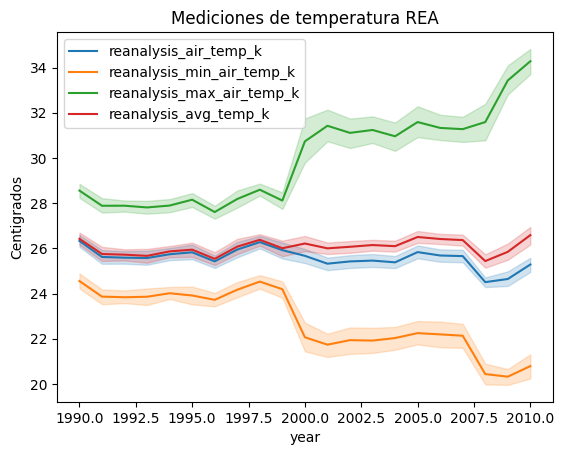

In [ ]:
# Plot temperatura rea
ax = plt.subplot()

for tmpt in df_rea_temp:
    sns.lineplot(data=train, x='year', y=tmpt, label=tmpt).set_title("Mediciones de temperatura REA")
ax.set_ylabel("Centigrados")



```
Observando nuestra gráfica podemos sacar algunas conclusiones
- La temperatura promedio y temperatura del aire varian muy poco en relación a la máxima y mínima,
 y son similares entre si
```
Si revisamos la variación estandar tanto para `aire` como para `promedio` es inferior a dos grados centrigrados, esto es un indicio de que estas son variables de aglomeración, lo cual no nos beneficia para nuestro análisis.

Una variable que no cambia en el tiempo no nos va a ser muy útil en nuestro modelo.

Por esta razón **eliminaremos estas dos variables** de nuestro dataset


In [ ]:
df_station_temp = train[['station_max_temp_c','reanalysis_max_air_temp_k','station_min_temp_c','reanalysis_min_air_temp_k']].copy()
df_station_temp.describe()

,station_max_temp_c,reanalysis_max_air_temp_k,station_min_temp_c,reanalysis_min_air_temp_k
count,1436.000,1446.000,1442.000,1446.000
mean,32.452,30.277,22.102,22.569
std,1.959,3.235,1.574,2.565
min,26.700,24.650,14.700,13.750
25%,31.100,27.850,21.100,20.750
50%,32.800,29.250,22.200,23.050
75%,33.900,32.350,23.300,24.750
max,42.200,40.850,25.600,26.750


Text(0, 0.5, 'Centigrados')

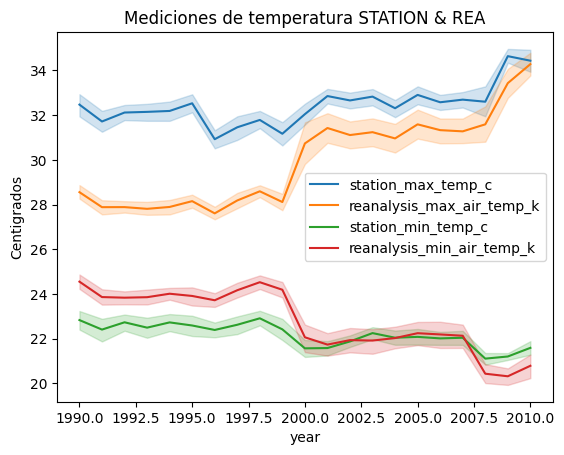

In [ ]:
# Plot todas temperaturas
ax = plt.subplot()

for tmpt in df_station_temp:
    sns.lineplot(data=train, x='year', y=tmpt, label=tmpt).set_title("Mediciones de temperatura STATION & REA")
ax.set_ylabel("Centigrados")



```
al observar las mediciones de temperatura podemos concluir:

- Temperaturas mínimas: ambos metodos de medición son similares.
- Temperaturas Máximas: no hay variación sgnificativa en el valor medido en la estación.

```

Una vez analizado los valores de temperatura tenemos las siguientes conclusiones:

Vamos a eliminar las columnas de temperatura y quedanos únicamente con las columnas máximas y mínimas de `Reanalysis`

Para los valores faltantes en esta columna igualmente realizaremos una interpolación en sus columnas





In [ ]:
# Eliminamos columnas de promedio
df_rea_temp.drop(['reanalysis_air_temp_k', 'reanalysis_avg_temp_k'], axis = 1, inplace = True)
df_rea_temp.interpolate( inplace = True )

In [ ]:
# Cargamos los valores completos e interpolados en centigrados
train['max_temp_c'] = df_rea_temp['reanalysis_max_air_temp_k']
train['min_temp_c'] = df_rea_temp['reanalysis_min_air_temp_k']

In [ ]:
# Eliminamos las columnas de temperatura que ya no necesitamos
train.drop(['reanalysis_air_temp_k','reanalysis_avg_temp_k',
            'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k',
            'station_avg_temp_c', 'station_max_temp_c',
            'station_min_temp_c'], axis = 1, inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   week_start_date                        1456 non-null   datetime64[ns]
 3   precipitation_amt_mm                   1443 non-null   float64       
 4   reanalysis_dew_point_temp_k            1446 non-null   float64       
 5   reanalysis_precip_amt_kg_per_m2        1446 non-null   float64       
 6   reanalysis_relative_humidity_percent   1446 non-null   float64       
 7   reanalysis_sat_precip_amt_mm           1443 non-null   float64       
 8   reanalysis_specific_humidity_g_per_kg  1446 non-null   float64       
 9   reanalysis_tdtr_k                      1446 non-null   float64 

In [ ]:
temp_range = train[['reanalysis_tdtr_k', 'station_diur_temp_rng_c']].copy()
temp_range.describe()

,reanalysis_tdtr_k,station_diur_temp_rng_c
count,1446.000,1413.000
mean,4.904,8.059
std,3.546,2.129
min,1.357,4.529
25%,2.329,6.514
50%,2.857,7.300
75%,7.625,9.567
max,16.029,15.800


Text(0, 0.5, 'Centigrados')

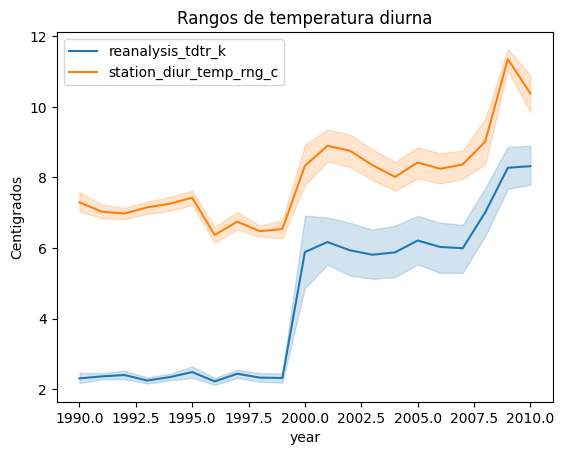

In [ ]:
ax = plt.subplot()

for columna in temp_range:
    sns.lineplot(data=train, x='year', y=columna, label=columna).set_title("Rangos de temperatura diurna")
ax.set_ylabel("Centigrados")

```
Nuevamente aqui tenemos una marcada diferencia entre los tipos de mediciones.

Al igual que en gráficas anteriores de temperatura hay una marcada diferencia en valores anes 2000 y luego del 2000.

Una teoría puede ser que se deba a algún cambio en los equipos de mediciones.
```

En este caso, las mediciones `Rea` se mantienen planas hasta cerca del año 2000 donde tienen una gran variación.

Debido a que las temperaturas máximas las tomamos de las medicoines `Rea` este cambio viene ya codificado en sus temperaturas, por lo que en esta ocasión mantendremos los datos de la estación local.

In [ ]:
temp_range.interpolate( inplace = True )
train['temp_range_c'] = temp_range['station_diur_temp_rng_c']
train.drop(['reanalysis_tdtr_k', 'station_diur_temp_rng_c'], axis = 1, inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1456 non-null   object        
 1   year                                   1456 non-null   int64         
 2   week_start_date                        1456 non-null   datetime64[ns]
 3   precipitation_amt_mm                   1443 non-null   float64       
 4   reanalysis_dew_point_temp_k            1446 non-null   float64       
 5   reanalysis_precip_amt_kg_per_m2        1446 non-null   float64       
 6   reanalysis_relative_humidity_percent   1446 non-null   float64       
 7   reanalysis_sat_precip_amt_mm           1443 non-null   float64       
 8   reanalysis_specific_humidity_g_per_kg  1446 non-null   float64       
 9   station_precip_mm                      1434 non-null   float64 

#### Humedad

De la mismo forma que lo hicimos con temperatura, analizaremos las variables relacionadas con humedad

In [ ]:
# Para una mejor visualización y comparación modificamos los valores de humedad relativa.

train['relative_humidity_mod'] = train['reanalysis_relative_humidity_percent'] / 4

Text(0, 0.5, 'Datos de humedad')

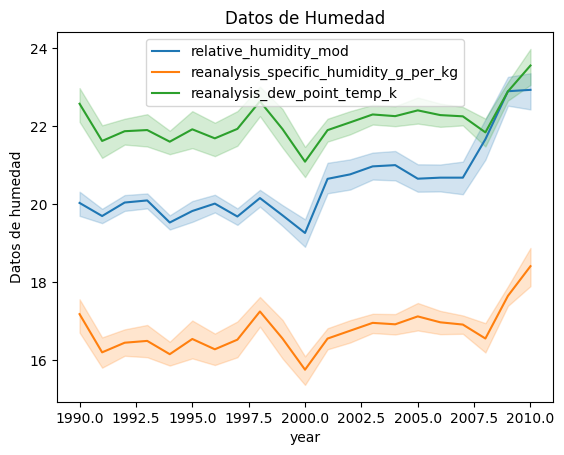

In [ ]:

df_humedad = train[['relative_humidity_mod',
                    'reanalysis_specific_humidity_g_per_kg',
                    'reanalysis_dew_point_temp_k']].copy()

ax = plt.subplot()
for columna in df_humedad:
    sns.lineplot(data=train, x='year', y=columna, label=columna).set_title("Datos de Humedad")
ax.set_ylabel("Datos de humedad")

In [ ]:
df_humedad.interpolate( inplace = True )
df_humedad.describe()

,relative_humidity_mod,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k
count,1456.000,1456.000,1456.000
mean,20.543,16.745,22.095
std,1.788,1.541,1.526
min,14.447,11.716,16.493
25%,19.299,15.555,20.968
50%,20.072,17.084,22.489
75%,21.609,17.976,23.308
max,24.652,20.461,25.300




```
En este caso podemos notar con las graficas que hay dos variables altamente correlacionadas, `dew_point` y `humidity_g_per_kg`

Por lo que la consideración será entre la humedad relativa y la humedad por kilogramo
```
Del gráfico tambien podmos concluir que hay una mayor variación en la variable `dew_point` finalmente será esta nuestra variable de humedad


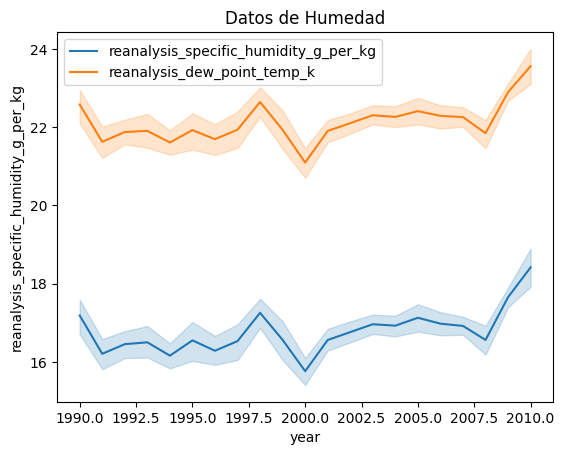

In [ ]:
for columna in train[['reanalysis_specific_humidity_g_per_kg','reanalysis_dew_point_temp_k']]:
    sns.lineplot(data=train, x='year', y=columna, label=columna).set_title("Datos de Humedad")

In [ ]:
df_humedad.corr()

,relative_humidity_mod,reanalysis_specific_humidity_g_per_kg,reanalysis_dew_point_temp_k
relative_humidity_mod,1.000,0.579,0.555
reanalysis_specific_humidity_g_per_kg,0.579,1.000,0.997
reanalysis_dew_point_temp_k,0.555,0.997,1.000


In [ ]:
train['humedad'] = df_humedad['reanalysis_dew_point_temp_k']
train.drop(['relative_humidity_mod ','reanalysis_specific_humidity_g_per_kg',
            'reanalysis_dew_point_temp_k','reanalysis_relative_humidity_percent'], axis = 1, inplace = True)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   city                      1456 non-null   object        
 1   year                      1456 non-null   int64         
 2   week_start_date           1456 non-null   datetime64[ns]
 3   precipitation_amt_mm      1456 non-null   float64       
 4   station_precip_mm         1456 non-null   float64       
 5   ndvi                      1456 non-null   float64       
 6   max_temp_c                1456 non-null   float64       
 7   min_temp_c                1456 non-null   float64       
 8   temp_range_c              1456 non-null   float64       
 9   humedad                   1456 non-null   float64       
 10  rea_precip_amt_kg_per_m2  1456 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 125.2+ KB


### Precipitaciones

In [ ]:
df_precipitaciones = train[['precipitation_amt_mm','station_precip_mm', 'reanalysis_sat_precip_amt_mm', 'reanalysis_precip_amt_kg_per_m2']].copy()
df_precipitaciones.describe()

,precipitation_amt_mm,station_precip_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
count,1443.000,1434.000,1443.000,1446.000
mean,45.760,39.326,45.760,40.152
std,43.716,47.455,43.716,43.434
min,0.000,0.000,0.000,0.000
25%,9.800,8.700,9.800,13.055
50%,38.340,23.850,38.340,27.245
75%,70.235,53.900,70.235,52.200
max,390.600,543.300,390.600,570.500


Text(0, 0.5, 'mm lluvia')

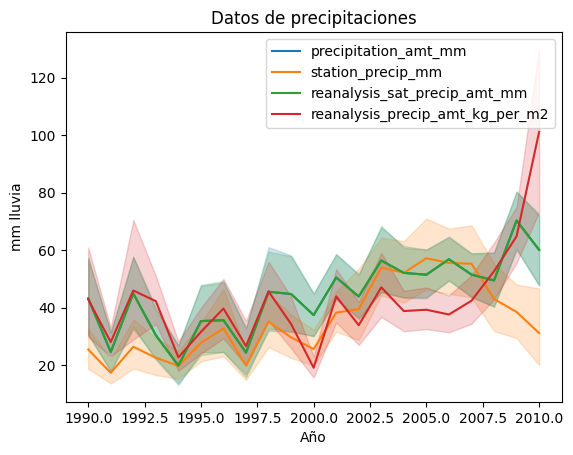

In [ ]:
fig, ax = plt.subplots( )

for columna in df_precipitaciones:
    sns.lineplot(data=train, x='year', y=columna, ax=ax, label=columna).set_title("Datos de precipitaciones")
ax.set_xlabel("Año")
ax.set_ylabel("mm lluvia")

Text(0.5, 1.0, 'Mapa de correlacion de Precipitaciones')

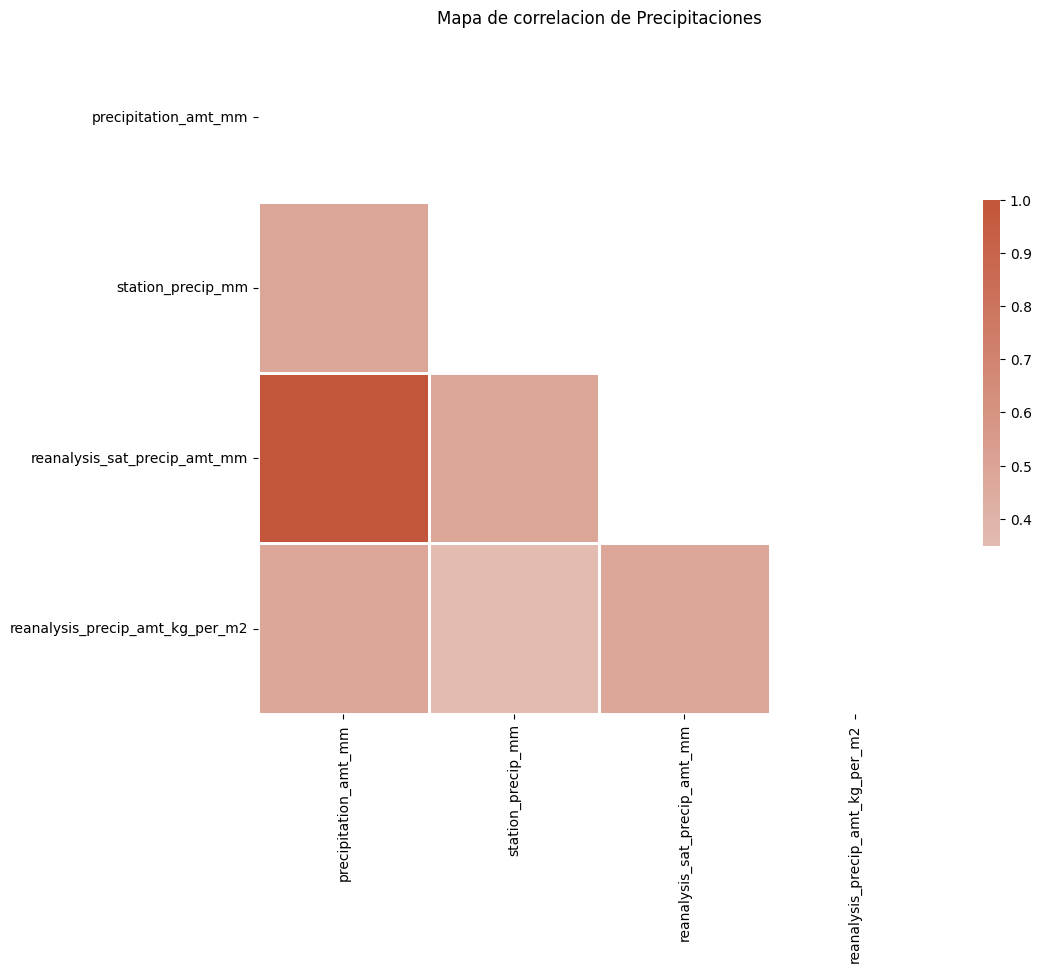

In [ ]:
"""
   Creamos un mapa de correlacion con el dataframe df_precipitaciones
"""
# Compute the correlation matrix
corr = df_precipitaciones.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}).set_title("Mapa de correlacion de Precipitaciones")

In [ ]:
corr

,precipitation_amt_mm,station_precip_mm,reanalysis_sat_precip_amt_mm,reanalysis_precip_amt_kg_per_m2
precipitation_amt_mm,1.000,0.487,1.000,0.481
station_precip_mm,0.487,1.000,0.487,0.349
reanalysis_sat_precip_amt_mm,1.000,0.487,1.000,0.481
reanalysis_precip_amt_kg_per_m2,0.481,0.349,0.481,1.000


```
Las columnas 'precipitation_amt_mm' y 'reanalysis_sat_precip_amt_mm	1.000' son iguales

Por lo tanto podemos precindier de una de ellas
```

Para las demas variables, si bien siguen una tendencia similar, no se puede observar un alto grado de correlación entre ellas, por lo que diferiremos su posible transformación o eliminación en los posteriores análisis. Por ahora realizaremos una interpolacion linean y eliminaremos la columna redundante

In [ ]:
df_precipitaciones.interpolate( inplace = True )
train['precipitation_amt_mm'] = df_precipitaciones['precipitation_amt_mm']
train['station_precip_mm'] = df_precipitaciones['station_precip_mm']
train['rea_precip_amt_kg_per_m2'] = df_precipitaciones['reanalysis_precip_amt_kg_per_m2']

train.drop(['reanalysis_sat_precip_amt_mm','reanalysis_precip_amt_kg_per_m2'], axis = 1, inplace = True)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   city                      1456 non-null   object        
 1   year                      1456 non-null   int64         
 2   week_start_date           1456 non-null   datetime64[ns]
 3   precipitation_amt_mm      1456 non-null   float64       
 4   station_precip_mm         1456 non-null   float64       
 5   ndvi                      1456 non-null   float64       
 6   max_temp_c                1456 non-null   float64       
 7   min_temp_c                1456 non-null   float64       
 8   temp_range_c              1456 non-null   float64       
 9   relative_humidity_mod     1446 non-null   float64       
 10  humedad                   1456 non-null   float64       
 11  rea_precip_amt_kg_per_m2  1456 non-null   float64       
dtypes: datetime64[ns](1)

In [4]:
# En este punto convertiré la variable de ciudad a tipo categorica

train['city'] = train['city'].astype('category')

train.head()

,city,year,week_start_date,precipitation_amt_mm,station_precip_mm,ndvi,max_temp_c,min_temp_c,temp_range_c,humedad,rea_precip_amt_kg_per_m2
0,sj,1990,1990-04-30,12.42,16.0,0.602425,26.65,22.75,6.900000,19.264286,32.00
1,sj,1990,1990-05-07,22.82,8.6,0.629918,27.75,23.25,6.371429,20.801429,17.94
2,sj,1990,1990-05-14,34.54,41.4,0.533260,27.35,24.15,6.485714,22.284286,26.10
3,sj,1990,1990-05-21,15.36,4.0,0.837143,28.25,23.85,6.771429,22.160000,13.90
4,sj,1990,1990-05-28,7.52,5.8,0.956940,28.75,24.35,9.371429,22.671429,12.20


## Reusltados

Hasta este punto hemos rellenado los valores faltantes, hemos analizado las variables por categorias, eliminado las columnas que consideramos redundantes y contamos con un dataset de datos completos y de una menor dimensionalidad para continuar con el análisis

---
# Características
---

## Distribucion de variables

A continuación dibujaremos la distribución de los valores de cada variable con el fin de analizar y buscar alguna peculiaridad en los datos.

Nos interesa conocer la figura de la distribución de probabilidades para los valores de cada columna

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

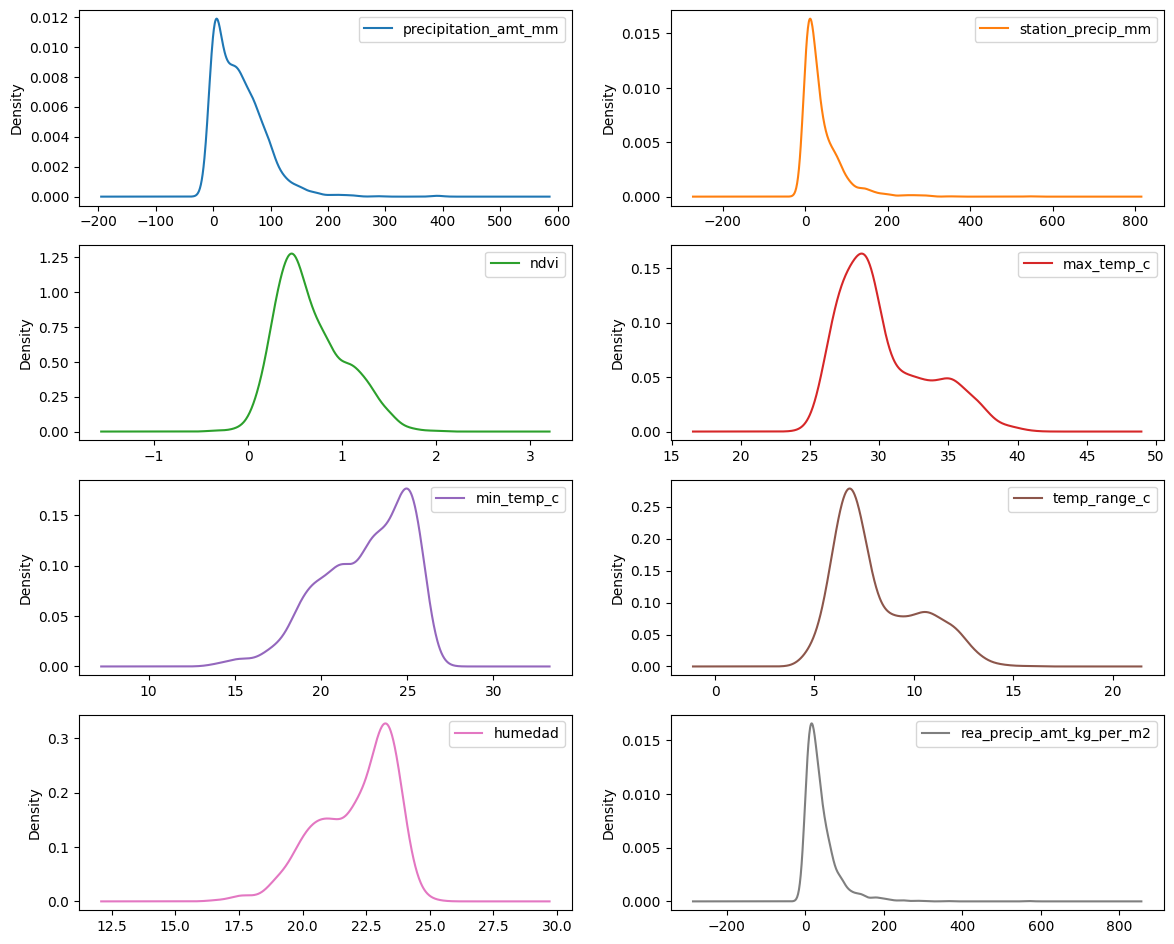

In [5]:
(train.drop(['year','city','week_start_date'], axis=1)
    .plot(kind='kde', subplots=True, figsize=(14, 30), layout=(10, 2), sharex=False))

```
Como ya lo habiamos observado en las graficas lineales,
existe una relación entre la temperatura, humedad, precipitación atmosférica.

En cuanto a la precipitación es posible que tengamos valores de outliers,
que estan distorcionando nuestra percepción de la gráfica. Esto lo podremos
determinar más adelante.
```

## Correlacion entre variables

Para poder continuar consideraremos cada ciudad de manera independiente y luago comparar que tan similares son sus correlaciones


In [6]:
# Aquí divido mi dataset por cada ciudad.

sj_df = train[train['city'] == 'sj']
iq_df = train[train['city'] == 'iq']

Text(0.5, 1.0, 'Mapa de Correlacion arriba "San Juan" abajo "Iquitos"')

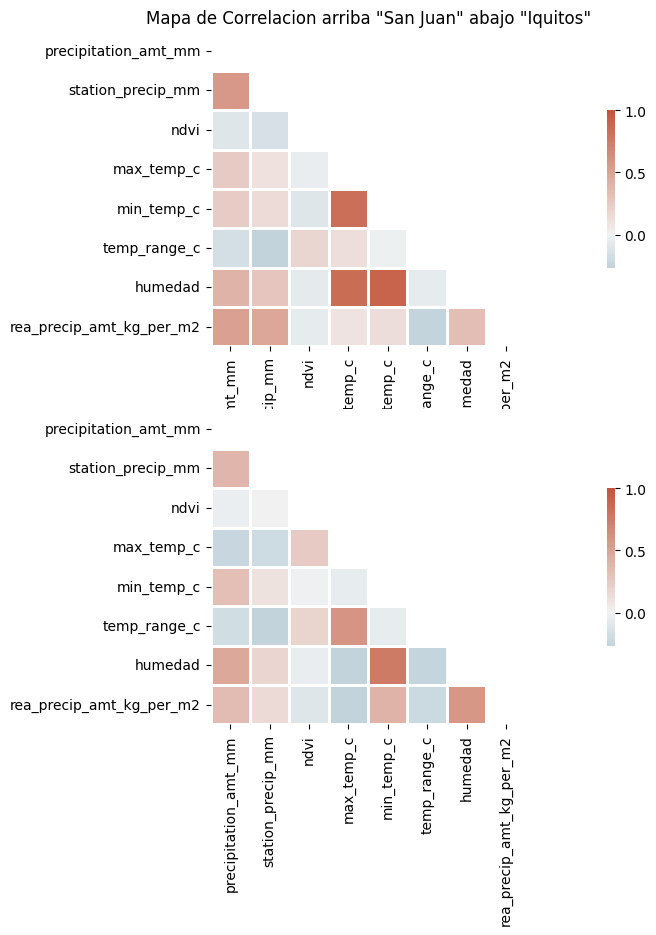

In [8]:
"""
   Creamos un mapa de correlacion con el dataframe train para cada ciuda
"""
# Calcular la matriz de correlación
corr_sj = sj_df.drop(['year','city','week_start_date'], axis=1).corr()
corr_iq = iq_df.drop(['year','city','week_start_date'], axis=1).corr()

# Generar una máscara para el triángulo superior
mask = np.triu(np.ones_like(corr_sj, dtype=bool))

# Creamos los objetos subplot
fig, axs = plt.subplots( 2, 1, figsize = (21, 9))

# Mapeo de color
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Creo las dos gráficas

sns.heatmap(corr_sj, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, ax=axs[0])
sns.heatmap(corr_iq, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}, ax=axs[1])

axs[0].set_title('Mapa de Correlacion arriba "San Juan" abajo "Iquitos"')

,precipitation_amt_mm,station_precip_mm,ndvi,max_temp_c,min_temp_c,temp_range_c,humedad,rea_precip_amt_kg_per_m2
precipitation_amt_mm,0.000000,0.192155,-0.061549,0.483403,-0.079844,0.023873,-0.070936,0.169158
station_precip_mm,0.192155,0.000000,-0.149617,0.302499,0.049576,-0.000707,0.097619,0.323146
ndvi,-0.061549,-0.149617,0.000000,-0.300646,-0.090593,-0.013454,-0.020883,0.040006
max_temp_c,0.483403,0.302499,-0.300646,0.000000,0.878099,-0.469605,1.101848,0.349869
min_temp_c,-0.079844,0.049576,-0.090593,0.878099,0.000000,0.028779,0.144023,-0.266344
temp_range_c,0.023873,-0.000707,-0.013454,-0.469605,0.028779,0.000000,0.191316,-0.038307
humedad,-0.070936,0.097619,-0.020883,1.101848,0.144023,0.191316,0.000000,-0.242511
rea_precip_amt_kg_per_m2,0.169158,0.323146,0.040006,0.349869,-0.266344,-0.038307,-0.242511,0.000000


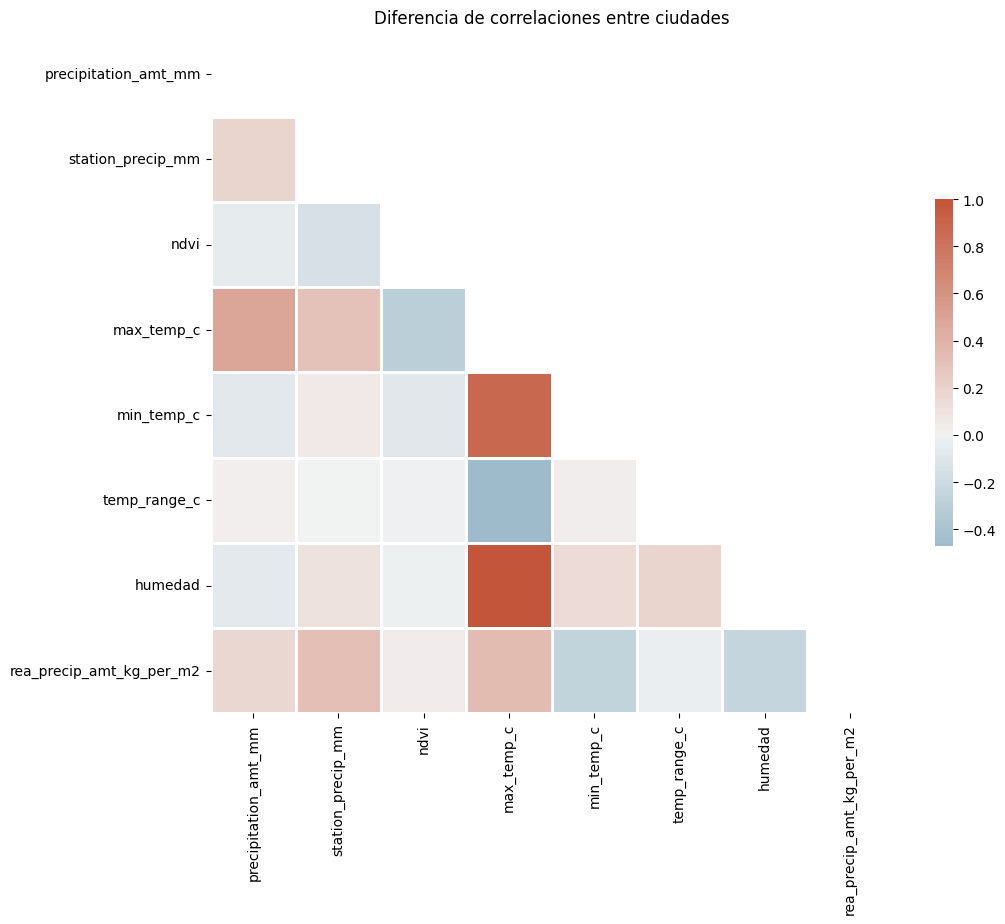

In [9]:
## Diferencias en la correlación

diff_corr = corr_sj - corr_iq

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(diff_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.8, cbar_kws={"shrink": .5}).set_title("Diferencia de correlaciones entre ciudades")
diff_corr

```
Al tratarse de ciudades con caracteristicas geograficas diferentes (costa vs amazonía)
encontramos diferencias al comparar entre las relaciones:

  - humedad    ~   temp_maxima
  - temp_min   ~   temp_maxima

Esto es algo que debemos tomar en cuenta si encontramos que estas dos variables tienen
un peso significativo en nuestro modelo
```

En este caso para poder distinguir cada ciudad y hacerlo de una manera que se acople a los algoritmos de cluster debo tener una distinción numérica. La mas sencilla binario, 1/0. Por lo que tiene mucho sentido binarizar mi variable categorica `city`

In [10]:
# Binarizador para la variable categórica city
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
train['city_bin'] = lb.fit_transform(train['city'])

## Estandarización de las variables (normalización)

Para continuar con el análisis en este punto realizaré la normalización de las variables para analizar la relación entre ellas, especialmente de las variables relacionadas a la precipitación.

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   city                      1456 non-null   category      
 1   year                      1456 non-null   int64         
 2   week_start_date           1456 non-null   datetime64[ns]
 3   precipitation_amt_mm      1456 non-null   float64       
 4   station_precip_mm         1456 non-null   float64       
 5   ndvi                      1456 non-null   float64       
 6   max_temp_c                1456 non-null   float64       
 7   min_temp_c                1456 non-null   float64       
 8   temp_range_c              1456 non-null   float64       
 9   humedad                   1456 non-null   float64       
 10  rea_precip_amt_kg_per_m2  1456 non-null   float64       
 11  city_bin                  1456 non-null   int64         
dtypes: category(1), date

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_normal = train.copy() # Copia para normalizar
var_numericas = ['precipitation_amt_mm', 'station_precip_mm', 'ndvi',
                 'max_temp_c', 'min_temp_c', 'temp_range_c', 'humedad', 'rea_precip_amt_kg_per_m2']


In [21]:
# Normalización de todas las variables numéricas del dataset
train_normal[var_numericas] = scaler.fit_transform(train[var_numericas])

### Análisis de precipitaciones

Una vez normalizados los valores, compararemos las distintas variables de precipitaciones con el fin de determinar las relaciones entre ellas.

In [28]:
# Variables a visualizar/analizar
features = ['precipitation_amt_mm',
            'station_precip_mm',
            'rea_precip_amt_kg_per_m2']

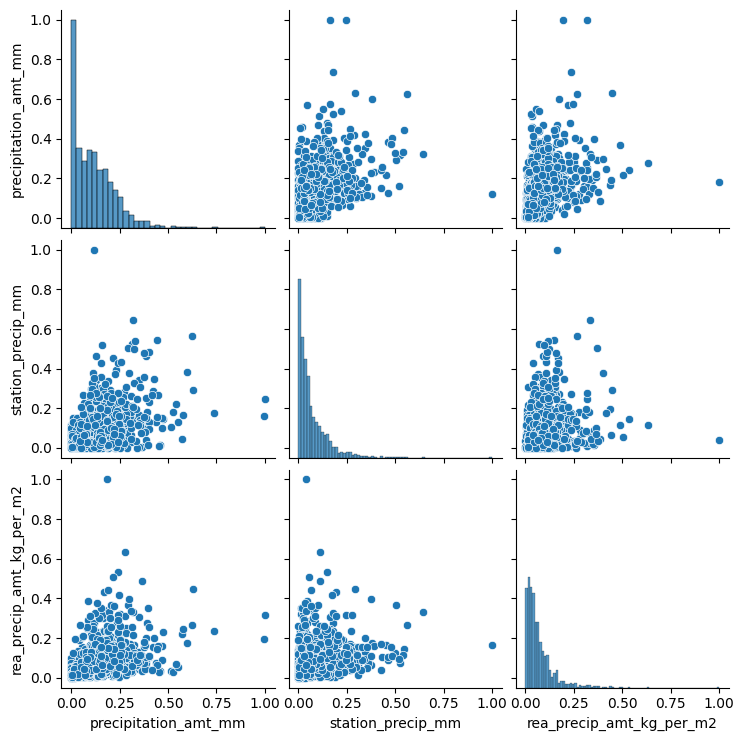

In [31]:
sns.pairplot(train_normal[features])
plt.show()

```
Aqui podemos graficamante visualizar que hay dos gráficas muy similares:

- precip_amt_mm ~ station_precip_mm
- precip_amt_mm ~ rea_precip_amnt_kg_per_m2

Siendo que ambas variables miden algo similar pero con unidades
ligeramente diferentes, podemos precindir de una de ellas.
```

Esto talves lo pudimos haber realizado con anterioridad, tan solo con visualizar las etiquetas de su descripción:

`reanalysis_precip_amt_kg_per_m2` – Total precipitation (Se elimina)
`station_precip_mm` – Total precipitation

Sin embargo ahora tenemos mejores argumentos para realizar esta.

Eliminando esta variable nos queda la relación existente entre:

`station_precip_mm` – Total precipitation (Weather Statio)
`precip_amt_mm` - Total precipitation (Satellite)

dos medidas de precipitación una medida desde el espacio y otra terrestre.

En este punto no sabemos cual de las dos nos brindará los mejores resultados, por lo que optamos por mantenerlas a las dos.

In [32]:
# Eliminamos la columna redundante:

train_normal.drop(['rea_precip_amt_kg_per_m2'], axis = 1, inplace = True)

### Análisis de Temperatura

De la misma manera realizaremos un análisis de las variables de temperatura

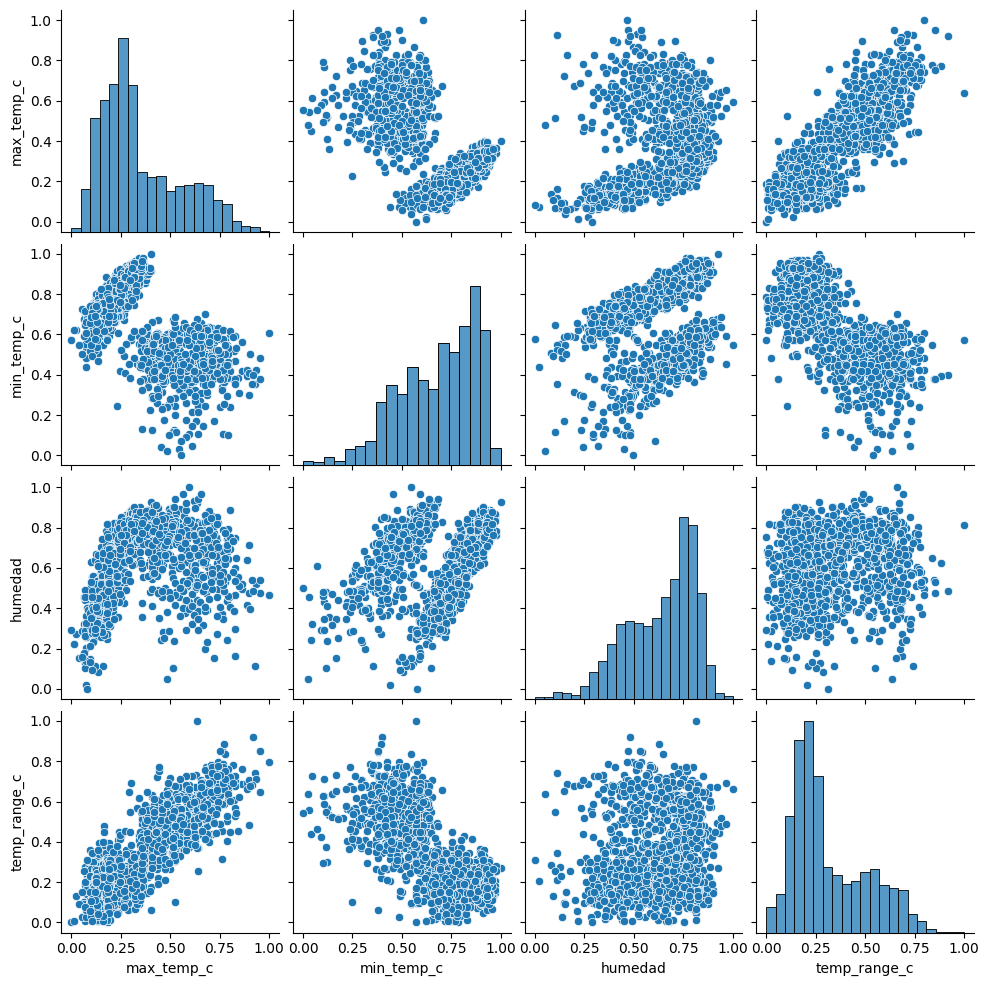

In [37]:
# Variables a visualizar/analizar
features = ['max_temp_c',
            'min_temp_c',
            'humedad',
            'temp_range_c']

sns.pairplot(train_normal[features])
plt.show()

```
Rápidamente podemos notar la relación lineal positiva entre:

 - temp_range_c  ~  max_temp_c

Podemos interpretar esta relación como que la información del rango
de temperatura se eneuntra ya codificada en la temperatura máxima.

De una manera similar existe la relación con la variable min_temp_c
sin embargo esta no es tan marcada como con la positiva.

Concluimos que podemos eliminar la variable temp_range_c

Algo interesante es observar la relación entre temperatura mínimia y
humedad, donde podemos observar dos clustes claramente marcados.

Esto se debe a los datos de las dos ciudades como ya habiamos
analizado previamente.
```

In [38]:
# Eliminamos la columna redundante:

train_normal.drop(['temp_range_c'], axis = 1, inplace = True)

In [39]:
train_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   city                  1456 non-null   category      
 1   year                  1456 non-null   int64         
 2   week_start_date       1456 non-null   datetime64[ns]
 3   precipitation_amt_mm  1456 non-null   float64       
 4   station_precip_mm     1456 non-null   float64       
 5   ndvi                  1456 non-null   float64       
 6   max_temp_c            1456 non-null   float64       
 7   min_temp_c            1456 non-null   float64       
 8   humedad               1456 non-null   float64       
 9   city_bin              1456 non-null   int64         
dtypes: category(1), datetime64[ns](1), float64(6), int64(2)
memory usage: 104.0 KB


---
# Clustering
---

<font color="green">*\[\[En esta sección se busca que el estudiante pruebe varias técnicas de clustering sobre el dataset, así como que las compare entre sí y decida cuál de ellas considera que es la que ha logrado agrupar mejor los datos en base a distintas métricas, experimentos, etc.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Hay que comparar con más de una técnica de clústering, como mínimo. Como aportación adicional, también se pueden usar algoritmos no vistos en clase.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: Se esperan clusterings de más de 3 dimensiones, aunque para visualizar los resultados en 2D/3D se pueden utilizar técnicas de reducción de dimensionalidad.\]\]*</font>

<font color="green">*\[\[IMPORTANTE: No basta con ejecutar los algoritmos y mostrar el resultado. Hay que comparar lo obtenido con los experimentos que se han hecho e ir extrayendo deducciones acerca de por qué un curso de experimentación fue o será mejor que otro.\]\]*</font>

## Algoritmos jerarquicos



In [41]:
# Preparamos las dependencias

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [42]:
# Realización del clustering de las variables numéricas.

Z = linkage(train_normal.drop(['year','city','week_start_date'], axis=1), method='average', metric='euclidean')

In [45]:
# Calculo de la bondad del Cluster

from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

# pdist calcula las distancias entre elementos de nuestro dataset usando la
# métrica indicada (euclideana por defecto)
c, coph_dists = cophenet(Z, pdist(train_normal.drop(['year','city','week_start_date'], axis=1)))
c

0.9724091232741194

```
Para nuestro primer análisis jerarquico obtenemos un valor
de coeficiente de correlación muy próximo a uno, con lo que
nos indica que ha conservado adecuadamente las distancias originales
```

In [54]:

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata




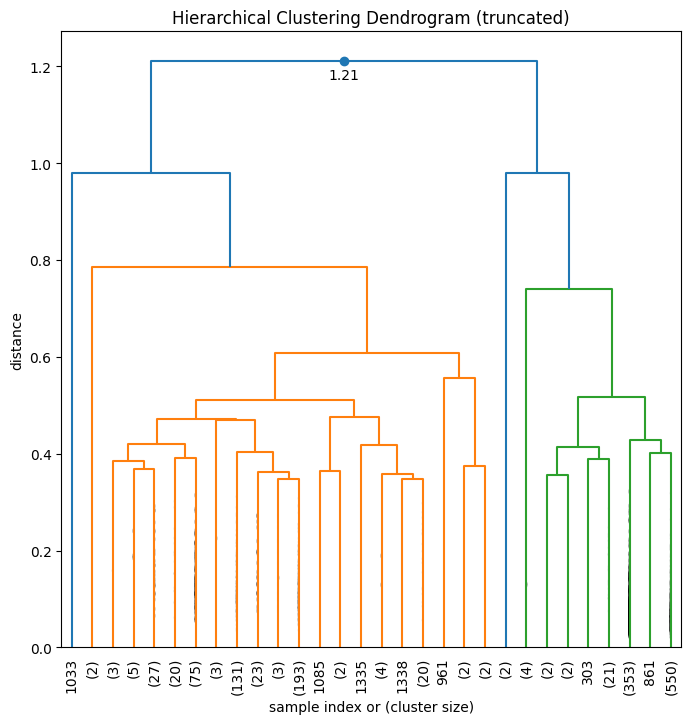

In [55]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above=1,  # useful in small plots so annotations don't overlap
)
plt.show()

# VAMOS HASTA AQUI

---



---
# Conclusiones
---

<font color="green">*\[\[Discusión final de los resultados de los resultados expuestos en la memoria, justificando la selección final de del algoritmo de clustering y de las variables finales.\]\]*</font>

<font color="green">*\[\[Discutir trabajo futuro: Mejoras del trabajo realizado que podrían llevarse a cabo pero que no se consideran parte de esta entrega.\]\]*</font>